# HW 1: Linear Algebra and Floating Point Arithmetic

### Direct Methods for the solution of Linear Systems
1. Given a matrix $A \in \mathbb{R}^{n \times n}$, the vector $x_{true} = (1,1,...,1)^T \in \mathbb{R}^n$, and a value for $n$, write a script that:
    - Computes the right-hand side of the linear system $y = A x_{true}$ (test problem).
    - Computes the condition number in 2-norm of the matrix $A$. It is ill-conditioned? What if we use the $\infty$-norm instead of the 2-norm?
    - Solves the linear system $Ax = y$ with the function `np.linalg.solve()`.
    - Computes the relative error between the computed solution and the true solution $x_{true}$.
    - Plot a graph (using `matplotlib.pyplot`) with the relative errors as a function of $n$ and (in a different window) the condition number in 2-norm and in $\infty$-norm, as a function of $n$.

2. Test the program above with the following choices of $A \in \mathbb{R}^{n \times n}$:
    - A random matrix (created with the function `np.random.rand()`) with size varying in $n = \{10, 20, 30, ..., 100\}$.
    - The Vandermonde matrix (`np.vander`) with dimension $n= \{5,10,15,20,25,30\}$ with respect to the vector $v = {1,2,3,...,n}$.
    - The Hilbert matrix (`scipy.linalg.hilbert`) with dimension $n= \{4, 5, 6, ..., 12\}$.

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [119]:
def compute_right_hand_side(A, x_true):
    return A @ x_true

def compute_condition_numbers(A):
    return np.linalg.cond(A, 2), np.linalg.cond(A, np.inf)

def solve_linear_system(A, b):
    return np.linalg.solve(A, b)

def compute_relative_error(x, x_true):
    return np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true, 2)

def plotGraph(n, R, k2, kinf):
    # First graph - Relative error
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(n, R, marker='o', linestyle='-', color='b', label='Relative Error')
    plt.yscale('log') 
    plt.xlabel('n')
    plt.ylabel('Relative Error (log scale)')
    plt.title('Relative Errors (log scale) vs n')
    plt.legend()
    plt.grid(True)

    # Second graph - Condition numbers
    plt.subplot(1, 2, 2)
    plt.plot(n, k2, marker='o', linestyle='-', color='r', label='Condition number (2-norm)')
    plt.plot(n, kinf, marker='s', linestyle='--', color='g', label='Condition number (inf-norm)')
    plt.yscale('log') 
    plt.xlabel('n')
    plt.ylabel('Condition number')
    plt.title('Condition Numbers vs n')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

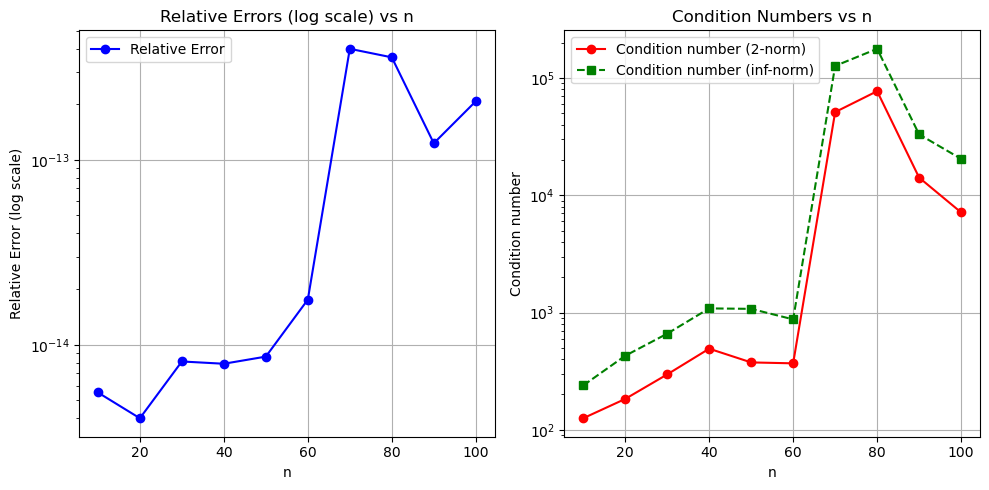

In [120]:
# RANDOM MATRICES
random_n = np.arange(10, 101, 10)
random_R = []
random_k2 = []
random_kinf = []

for n in random_n:
    x_true = np.ones((n,))
    A = np.random.rand(n, n)
    b = compute_right_hand_side(A, x_true)
    k2, kinf = compute_condition_numbers(A)
    random_k2.append(k2)
    random_kinf.append(kinf)
    x = solve_linear_system(A, b)
    random_R.append(compute_relative_error(x, x_true))


plotGraph(random_n, random_R, random_k2, random_kinf)


The condition numbers, both in 2-norm and infinity-norm, remain relatively low and do not show significant changes as the matrix size $n$ increases. This suggests that random matrices are, on average, well-conditioned. A low condition number indicates that small perturbations in the input data will not drastically affect the solution, making the numerical method more stable.

The relative errors between the computed solutions and the true solution remain small across all tested values of $n$. This demonstrates that the random matrices are numerically stable, and the solutions obtained using `np.linalg.solve()` provide good approximations of the true solution $(x_{\mathrm{true}})$. Even as $n$ grows, the error does not increase significantly, further highlighting the well-conditioned nature of the random matrices.

Overall, the low condition numbers and small relative errors suggest that the solution procedure is numerically stable. As $n$ increases, the direct solver shows no signs of significant instability, indicating the robustness of the numerical methods employed.


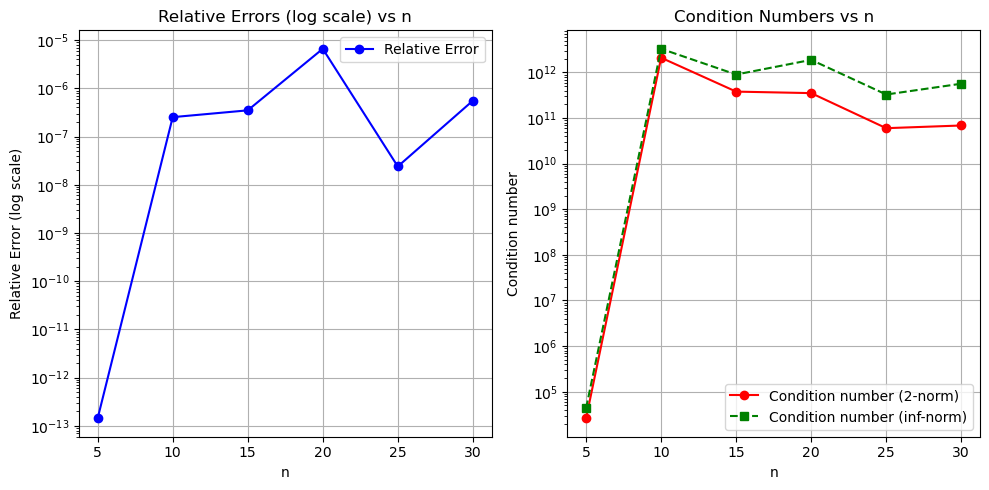

In [121]:
# VANDERMONDE MATRICES
vandermonde_n = np.arange(5, 31, 5)
vandermonde_R = []
vandermonde_k2 = []
vandermonde_kinf = []

for n in vandermonde_n:
    x_true = np.ones((n,))
    v = np.arange(1, n+1, 1)
    A = np.vander(v, N=n)
    b = compute_right_hand_side(A, x_true)
    k2, kinf = compute_condition_numbers(A)
    vandermonde_k2.append(k2)
    vandermonde_kinf.append(kinf)
    x = solve_linear_system(A, b)
    vandermonde_R.append(compute_relative_error(x, x_true))

plotGraph(vandermonde_n, vandermonde_R, vandermonde_k2, vandermonde_kinf)

The condition numbers increase rapidly with $n$, showing an exponential growth. This reflects the fact that Vandermonde matrices are notoriously ill-conditioned. A high condition number indicates that small perturbations in the input data can lead to significant variations in the solution, making the numerical method more unstable.

The relative errors increase significantly for larger values of $n$, confirming the difficulty in solving linear systems associated with these matrices. This rise in errors highlights the numerical instability that occurs when working with larger Vandermonde matrices.


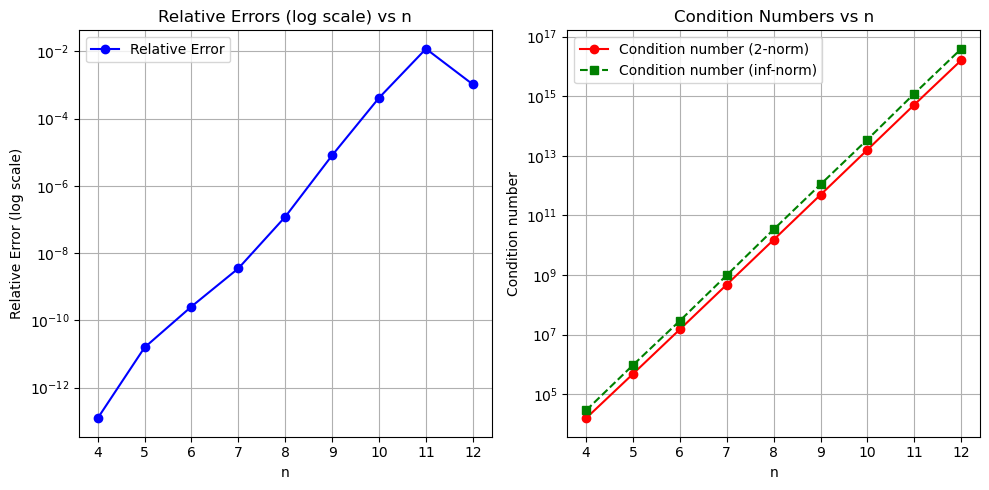

In [122]:
# HILBERT MATRICES
hilbert_n = np.arange(4, 13, 1)
hilbert_R = []
hilbert_k2 = []
hilbert_kinf = []

for n in hilbert_n:
    x_true = np.ones((n,))
    A = sp.linalg.hilbert(n)
    b = compute_right_hand_side(A, x_true)
    k2, kinf = compute_condition_numbers(A)
    hilbert_k2.append(k2)
    hilbert_kinf.append(kinf)
    x = solve_linear_system(A, b)
    hilbert_R.append(compute_relative_error(x, x_true))

plotGraph(hilbert_n, hilbert_R, hilbert_k2, hilbert_kinf)


Similarly, the condition number increases rapidly with $n$. However, the rate of growth is slower compared to Vandermonde matrices. 

The relative errors, while increasing with $n$, are less extreme than those observed with Vandermonde matrices, but still highlight numerical difficulties. This suggests that although Hilbert matrices are better conditioned than Vandermonde matrices, they still pose challenges for numerical solutions as their size grows.


#### Conclusions

The results demonstrate that the condition number of the matrix is a good indicator of the stability and accuracy of the numerical computation. 
- Well-conditioned matrices (e.g., random matrices for moderate sizes) produce accurate solutions.
- Ill-conditioned matrices (such as Vandermonde and Hilbert matrices) exhibit high relative errors, making it difficult to obtain precise solutions.

Although the condition numbers in both 2-norm and infinity-norm follow the same general trend, there can be quantitative differences. The choice of what norm to use depends on the specific problem and the properties of the matrix involved. In general, the 2-norm is more commonly used, but the infinity-norm can provide additional insights in certain cases.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Floating point arithmetic

1. The Machine epsilon $\epsilon$ is defined as the smallest floating point number such that it holds: $fl(1 + \epsilon) > 1$. Compute $\epsilon$. *Tips:* use a `while` structure.

2. Let’s consider the sequence $a_n = (1 + \frac{1}{n})^n$. It is well known that: $\lim_{n \to \infty} a_n = e$, where $e$ is the Nepero number. Choose diﬀerent values for $n$, compute $a_n$ and compare it to the real value of the Nepero number. What happens if you choose a large value of $n$?

3. Let’s consider the matrices:

$$
A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} \quad B = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix}
$$

Compute the rank of $A$ and $B$ and their eigenvalues. Are $A$ and $B$ full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples. *Tips:* Please, have a look at `np.linalg`.

In [123]:
eps = 1.0
count = 0
while 1.0 + eps > 1.0:
    eps /= 2.0
    count += 1
eps *= 2.0
print(f"Machine epsilon: {eps}")
print(f"Number of iterations: {count}")

print(f"Machine epsilon calulated with np.finfo: {np.finfo(float).eps}")

Machine epsilon: 2.220446049250313e-16
Number of iterations: 53
Machine epsilon calulated with np.finfo: 2.220446049250313e-16


The machine epsilon shows how floating-point numbers are represented with finite precision. The numbers are approximated, and when the difference between two numbers becomes smaller than epsilon, the machine is no longer able to detect differences. The machine epsilon is a crucial parameter in numerical computations, as it determines the precision of the calculations.

In [124]:
def calculate_sequence(limit=10000, tolerance=1e-5):
    n = 1
    sequence_value = (1 + 1/n)**n
    while abs(sequence_value - np.e) > tolerance and n <= limit:
        n += 1
        sequence_value = (1 + 1/n)**n
    return n, sequence_value

n_value, sequence_value = calculate_sequence()
print(f"Numero di iterazioni: {n_value}")
print(f"Valore della sequenza: {sequence_value}")
print(f"Valore di e: {np.e}")

Numero di iterazioni: 10001
Valore della sequenza: 2.7181459404132355
Valore di e: 2.718281828459045


The sequence converges slowly to $e$, and we can observe that, for small values of $n$, the sequence is still far from $e$. However, as $n$ increases, the sequence gets closer and closer to the value of $e$. As $n$ increases, numerical calculations may lose precision. This phenomenon becomes evident when the values become too large for floating-point numbers, leading to rounding errors. We saw that the value of the sequence can diverge from the real values of $e$ for very large $n$. For this reason, I used a tolerance criterion to stop when the value of the sequence is sufficiently close to $e$: that reduced computational costs and improves efficiency.


In [125]:

A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)

eigvals_A = np.linalg.eigvals(A)
eigvals_B = np.linalg.eigvals(B)

print(f"Rank of A: {rank_A}")
print(f"Rank of B: {rank_B}")
print(f"Eigenvalues of A: {eigvals_A}")
print(f"Eigenvalues of B: {eigvals_B}")


Rank of A: 2
Rank of B: 1
Eigenvalues of A: [5. 2.]
Eigenvalues of B: [5. 0.]


In [126]:
# other examples
C = np.array([[3, 1], [2, 2]])
D = np.array([[2, 4], [1, 2]])

rank_C = np.linalg.matrix_rank(C)
rank_D = np.linalg.matrix_rank(D)

eigvals_C = np.linalg.eigvals(C)
eigvals_D = np.linalg.eigvals(D)

print(f"Rank of C: {rank_C}")
print(f"Rank of D: {rank_D}")

print(f"Eigenvalues of C: {eigvals_C}")
print(f"Eigenvalues of D: {eigvals_D}")

Rank of C: 2
Rank of D: 1
Eigenvalues of C: [4. 1.]
Eigenvalues of D: [4. 0.]


In [127]:
E = np.array([[0, 2, 3], [4, 5, 6], [7, 8, 9]])
F = np.array([[1, 2, 3], [2, 4, 6], [7, 8, 9]])

rank_E = np.linalg.matrix_rank(E)
rank_F = np.linalg.matrix_rank(F)

eigvals_E = np.linalg.eigvals(E)
eigvals_F = np.linalg.eigvals(F)

print(f"Rank of G: {rank_E}")
print(f"Rank of H: {rank_F}")
print(f"Eigenvalues of G: {eigvals_E}")
print(f"Eigenvalues of H: {eigvals_F}")

Rank of G: 3
Rank of H: 2
Eigenvalues of G: [16.01040388 -1.91242451 -0.09797938]
Eigenvalues of H: [ 1.55440037e+01 -1.03877322e-15 -1.54400375e+00]


### Rank of Matrices:

The rank of a matrix provides information about its linear independence. If a matrix has full rank, it means that its rows (or columns) are linearly independent. If the rank is less than the maximum, the rows (or columns) are linearly dependent, and the matrix is singular. In the case of matrices $A$ and $B$, we saw that matrix $A$ is full-rank, meaning that none of its rows or columns is redundant. However, matrix $B$ is **not full-rank**, indicating that there is linear dependence between its rows or columns.

### Eigenvalues and Rank Condition:

The eigenvalues of a matrix provide information about its invertibility and geometric properties. If a matrix has zero eigenvalues, it is singular (non-invertible). On the other hand, if all the eigenvalues are non-zero, the matrix is invertible and has full rank. Matrix $A$ is full-rank, and its eigenvalues are non-zero. Matrix $B$, however, has eigenvalues 0 and 5, which confirms that it is singular, as one of its eigenvalues is zero, and hence it is not invertible.
